In [23]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
#Cargar los datos del archivo .txt
data = pd.read_csv("data_ecu.txt", delimiter="\t", header=0)
data.head()

,Longitude,Latitude
0,-80.43876447751417,"-0,9519244059855368"
1,-80.42499386576185,"-0,7890541493993685"
2,-78.4154028108096,"-0,0191854793665598"
3,-79.91790871558031,"-2,1991032880049435"
4,-80.48995382890078,"-0,496245130223165"


In [3]:
# Verificar cuantos registros tengo en latitud y longitud
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Longitude  290 non-null    object
 1   Latitude   305 non-null    object
dtypes: object(2)
memory usage: 4.9+ KB


In [7]:
data.isnull().sum()

Longitude    15
Latitude      0
dtype: int64

In [6]:
# Reemplazar comas por puntos en las columnas de Longitud y Latitud
data['Longitude'] = data['Longitude'].str.replace(',', '.')
data['Latitude'] = data['Latitude'].str.replace(',', '.')

In [8]:
# Guardar los índices de las filas con valores no válidos
invalid_rows = data[data['Longitude'].isnull() | data['Latitude'].isnull()].index

In [9]:
invalid_rows

Int64Index([5, 9, 109, 152, 175, 196, 203, 226, 233, 266, 300, 301, 302, 303,
            304],
           dtype='int64')

In [10]:
# Eliminar filas que contengan valores no numéricos o nulos
data = data[pd.to_numeric(data['Longitude'], errors='coerce').notnull()]
data = data[pd.to_numeric(data['Latitude'], errors='coerce').notnull()]

In [25]:
# Eliminar filas inválidas para ajustar el modelo de K-means
valid_data = data.dropna(subset=['Longitude', 'Latitude'])

In [12]:
# Conversión de tipo de dato
data['Longitude'] = data['Longitude'].astype(float)
data['Latitude'] = data['Latitude'].astype(float)

In [13]:
# Definir K-means con 3 clusters
kmeans = KMeans(n_clusters = 3, random_state = 42)

In [14]:
# Ajustar los datos de latitud y longitud
coordinates_ecu = data[['Longitude', 'Latitude']].values
kmeans.fit(coordinates_ecu)

KMeans(n_clusters=3, random_state=42)

In [15]:
# Predecir etiquetas
labels = kmeans.labels_

In [16]:
labels

array([0, 0, 1, 2, 0, 1, 1, 2, 0, 2, 0, 2, 1, 0, 0, 0, 1, 1, 2, 1, 0, 0,
       1, 2, 0, 0, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 2, 2, 1, 2, 0, 2, 2, 1, 1, 2, 2, 0,
       2, 1, 1, 1, 0, 1, 1, 0, 2, 2, 2, 0, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2,
       1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 0, 2, 2, 1, 0, 0, 1, 2, 1, 1, 2, 0,
       0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 2, 2, 2, 0, 1, 1, 0, 0, 2, 1, 2,
       0, 1, 2, 2, 2, 1, 0, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 0,
       1, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 0, 0, 1,
       2, 1, 1, 0, 2, 2, 0, 2, 2, 0, 1, 2, 1, 0, 0, 1, 2, 0, 2, 0, 0, 2,
       0, 0, 1, 2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 1, 2, 1, 2,
       1, 1, 2, 2, 0, 2, 2, 2, 0, 2, 2, 1, 1, 0, 0, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2, 2, 0, 1, 0, 2, 1, 2, 1, 0,
       1])

In [26]:
# Añadir las etiquetas de los clusters
valid_data['cluster_label'] = labels

In [17]:
# Generar los ids ubicación y las etiquetas de los clusters
output_data = pd.DataFrame({
    'location_id': valid_data.index,
    'cluster_label': labels
})

In [18]:
# Las ubicaciones no válidas, se genera un cluster especial, -1
invalid_data = pd.DataFrame({
    'location_id': invalid_rows,
    'cluster_label': -1
})

In [19]:
# Combinar las ubicaciones válidas y no válidas
final_data = pd.concat([output_data, invalid_data]).sort_values(by='location_id')

In [20]:
# Guardar el archivo de salida 'clusters.txt'
final_data.to_csv('clusters.txt', sep=' ', header=False, index=False)

In [21]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 14
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   location_id    302 non-null    int64
 1   cluster_label  302 non-null    int64
dtypes: int64(2)
memory usage: 7.1 KB


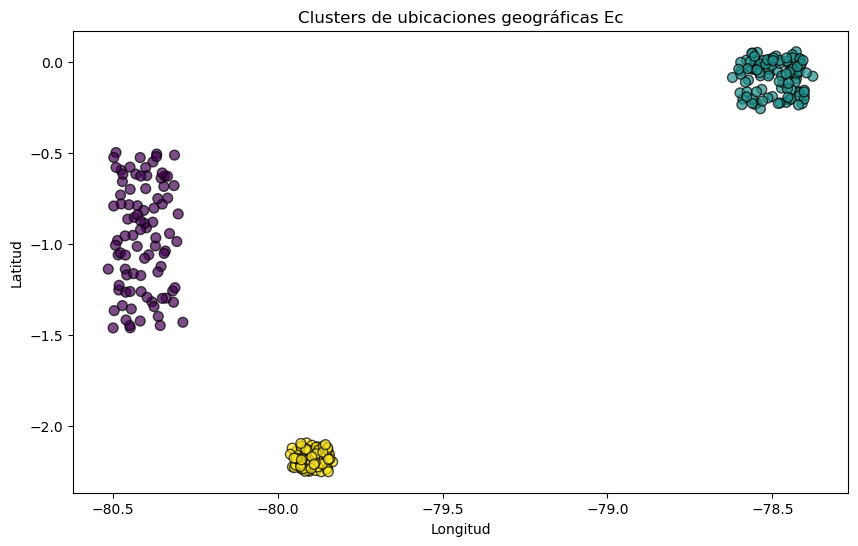

In [27]:
#Gráfico
plt.figure(figsize=(10, 6))
plt.scatter(valid_data['Longitude'], valid_data['Latitude'], c=valid_data['cluster_label'], cmap='viridis', marker='o', s=50, alpha=0.7, edgecolor='k')
plt.title('Clusters de ubicaciones geográficas Ec')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()